In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0,10.0)

data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
X = data['Head Size(cm^3)']
Y = data['Brain Weight(grams)']


In [4]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

m = len(X)

numer = 0
denom = 0

for i in range(m):
    numer += (X[i] - mean_x) * (Y[i]- mean_y)
    denom += (X[i] - mean_x) **2
    
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)
print(b1, b0)

0.26342933948939945 325.57342104944223


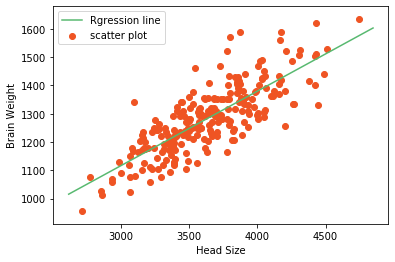

In [6]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 *x
plt.plot(x,y, color='#58b970', label="Rgression line")
plt.scatter(X,Y, c="#ef5423", label="scatter plot")

plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.legend()
plt.show()

In [11]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) **2
    ss_r += (Y[i] - y_pred) **2

r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((m, 1))
reg = LinearRegression()
reg = reg.fit(X,Y)
Y_pred = reg.predict(X)
r2_score = reg.score(X,Y)
print(r2_score)


AttributeError: 'Series' object has no attribute 'reshape'